# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
from datetime import datetime



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
## List for holding lat_lngs and cities
#lat_lngs = []
#cities = []

## Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#lat_lngs = zip(lats, lngs)

## Identify nearest city for each lat, lng combination
#for lat_lng in lat_lngs:
#    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#    # If the city is unique, then add it to a our cities list
#    if city not in cities:
#        cities.append(city)

## Print the city count to confirm sufficient count
#len(cities)

In [3]:
#Here we will store the cities
cities = []
#Num of cities we want to get
numCities = 601
#A counter to avoid making too many Api Calls
count = round(numCities*3,0)

while numCities > 0:
    count = count -1
    lat = np.random.uniform(lat_range[0], lat_range[1])
    long = np.random.uniform(lng_range[0], lng_range[1])
    city = citipy.nearest_city(lat,long).city_name
    
    if city not in cities:
        cities.append(city)
        numCities = numCities-1
    if count == 0:
        print('We have trouble finding that number of cities, try a lower one, or increase the number of operations')
        break
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#cities = cities[0:30]
#Create lists to store information
#Initialize lists to store the information
temperature = []
humidity = []
cloudiness = []
windspeed = []
cities_name = []
latitude = []
longitude = []
date = []
maxtemp = []
countries = []
i = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    url_q = url + "appid=" + weather_api_key + "&q=" + city+"&units=imperial"
    try:
        i=i+1
        weather_response = requests.get(url_q)
        weather_json = weather_response.json()
        
        temperature.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        latitude.append(weather_json['coord']['lat'])
        longitude.append(weather_json['coord']['lon'])
        maxtemp.append(weather_json['main']['temp_max'])
        date.append(weather_json['dt'])
        countries.append(weather_json['sys']['country'])
        cities_name.append(city)
        print(f"{i} City: {city}\
        temperature: {temperature[-1]}\
        humidity: {humidity[-1]}\
        cloudiness:{cloudiness[-1]}\
        wind speed:{windspeed[-1]}")
        #pprint(weather_json)
        #break
    except KeyError:
        #Some cities do not have information in this API, we catch the error 
        print(f'------{i} {city} information not available-----')


1 City: talavera        temperature: 80.6        humidity: 74        cloudiness:75        wind speed:22.37
2 City: saskylakh        temperature: -27.94        humidity: 82        cloudiness:77        wind speed:1.92
3 City: geraldton        temperature: 91.4        humidity: 35        cloudiness:75        wind speed:23.02
4 City: vaini        temperature: 86        humidity: 74        cloudiness:75        wind speed:8.05
5 City: butaritari        temperature: 81.32        humidity: 83        cloudiness:0        wind speed:12.15
6 City: cardoso        temperature: 70.68        humidity: 87        cloudiness:100        wind speed:5.59
7 City: pokaran        temperature: 66.6        humidity: 26        cloudiness:1        wind speed:6.29
8 City: florianopolis        temperature: 73.4        humidity: 94        cloudiness:75        wind speed:2.3
9 City: new norfolk        temperature: 70.79        humidity: 41        cloudiness:95        wind speed:4
10 City: tasiilaq        temperature: 

82 City: carnarvon        temperature: 86        humidity: 79        cloudiness:90        wind speed:11.5
83 City: port lincoln        temperature: 68.94        humidity: 59        cloudiness:23        wind speed:9.78
84 City: saint george        temperature: 54.46        humidity: 43        cloudiness:1        wind speed:5.75
85 City: twentynine palms        temperature: 57.9        humidity: 38        cloudiness:1        wind speed:17.27
------86 palabuhanratu information not available-----
87 City: kapaa        temperature: 75.65        humidity: 60        cloudiness:1        wind speed:8.05
88 City: mathathane        temperature: 73.11        humidity: 74        cloudiness:52        wind speed:3.58
89 City: kajaani        temperature: 5        humidity: 92        cloudiness:33        wind speed:4.61
90 City: hithadhoo        temperature: 82.4        humidity: 73        cloudiness:98        wind speed:11.99
91 City: bani        temperature: 73.53        humidity: 100        cloudine

163 City: kawalu        temperature: 83.89        humidity: 70        cloudiness:87        wind speed:1.59
164 City: praia da vitoria        temperature: 60.46        humidity: 72        cloudiness:40        wind speed:29.71
165 City: morrope        temperature: 75.4        humidity: 87        cloudiness:100        wind speed:1.99
166 City: svetlaya        temperature: 36.81        humidity: 79        cloudiness:90        wind speed:7.87
167 City: camacupa        temperature: 59        humidity: 83        cloudiness:3        wind speed:4.03
168 City: port hardy        temperature: 33.39        humidity: 51        cloudiness:90        wind speed:29.93
169 City: rawlins        temperature: -2.2        humidity: 71        cloudiness:90        wind speed:11.5
170 City: vila velha        temperature: 76.48        humidity: 83        cloudiness:0        wind speed:5.75
171 City: kachiry        temperature: -11.6        humidity: 89        cloudiness:0        wind speed:8.48
172 City: kavieng

240 City: kahului        temperature: 74.32        humidity: 54        cloudiness:40        wind speed:21.85
241 City: gasa        temperature: 52.45        humidity: 87        cloudiness:0        wind speed:2.3
242 City: dudinka        temperature: -23.75        humidity: 86        cloudiness:100        wind speed:3.49
243 City: maceio        temperature: 75.2        humidity: 94        cloudiness:75        wind speed:4.61
244 City: lujan        temperature: 66.99        humidity: 99        cloudiness:96        wind speed:7
245 City: lebu        temperature: 57.56        humidity: 84        cloudiness:0        wind speed:14.23
246 City: maarianhamina        temperature: 28.4        humidity: 74        cloudiness:0        wind speed:12.66
247 City: clyde river        temperature: -2.2        humidity: 92        cloudiness:100        wind speed:23.02
------248 mys shmidta information not available-----
249 City: kyaikto        temperature: 78.91        humidity: 50        cloudiness:51 

319 City: dicamay        temperature: 74.3        humidity: 81        cloudiness:98        wind speed:3
320 City: vanavara        temperature: -14.67        humidity: 88        cloudiness:100        wind speed:3.04
321 City: vieques        temperature: 73.4        humidity: 83        cloudiness:20        wind speed:4.61
322 City: pauini        temperature: 73.96        humidity: 97        cloudiness:100        wind speed:2.01
323 City: jarvenpaa        temperature: 17.58        humidity: 100        cloudiness:75        wind speed:2.3
324 City: zyryanka        temperature: -21.12        humidity: 86        cloudiness:17        wind speed:3.98
325 City: wanaka        temperature: 77        humidity: 39        cloudiness:65        wind speed:5.99
326 City: ilulissat        temperature: 12.2        humidity: 79        cloudiness:40        wind speed:4.61
327 City: san cristobal        temperature: 66.54        humidity: 74        cloudiness:41        wind speed:1.61
328 City: umm lajj     

398 City: chinchani        temperature: 73.69        humidity: 49        cloudiness:0        wind speed:1.81
399 City: vredendal        temperature: 64.56        humidity: 88        cloudiness:72        wind speed:0.92
400 City: pitimbu        temperature: 77        humidity: 100        cloudiness:90        wind speed:6.91
401 City: humaita        temperature: 75.45        humidity: 90        cloudiness:97        wind speed:0.27
402 City: iroquois falls        temperature: -13        humidity: 64        cloudiness:1        wind speed:5.75
403 City: sabla        temperature: 69.89        humidity: 20        cloudiness:0        wind speed:9.78
------404 paradwip information not available-----
405 City: itinga        temperature: 70.52        humidity: 79        cloudiness:61        wind speed:2.59
406 City: grand baie        temperature: 75.99        humidity: 85        cloudiness:8        wind speed:5.99
407 City: anadyr        temperature: -14.35        humidity: 70        cloudiness:4

479 City: puerto ayacucho        temperature: 80.31        humidity: 64        cloudiness:93        wind speed:4.25
480 City: lubango        temperature: 53.15        humidity: 66        cloudiness:6        wind speed:2.66
481 City: kaupanger        temperature: 3.99        humidity: 84        cloudiness:0        wind speed:1.99
482 City: naze        temperature: 69.8        humidity: 83        cloudiness:75        wind speed:19.57
483 City: shiyan        temperature: 57.99        humidity: 48        cloudiness:100        wind speed:2.35
484 City: port hedland        temperature: 89.6        humidity: 55        cloudiness:90        wind speed:10.36
485 City: bartica        temperature: 77        humidity: 88        cloudiness:75        wind speed:4.61
486 City: grand gaube        temperature: 75.99        humidity: 85        cloudiness:3        wind speed:5.99
487 City: lugovoy        temperature: 34.97        humidity: 85        cloudiness:100        wind speed:1.3
488 City: jiayuguan

558 City: ocos        temperature: 77        humidity: 83        cloudiness:20        wind speed:2.3
559 City: kununurra        temperature: 93.2        humidity: 59        cloudiness:40        wind speed:11.5
560 City: gat        temperature: 50.65        humidity: 88        cloudiness:0        wind speed:2.28
561 City: marinette        temperature: 6.8        humidity: 72        cloudiness:90        wind speed:6.91
------562 cheuskiny information not available-----
563 City: singaraja        temperature: 85.19        humidity: 63        cloudiness:42        wind speed:4.29
564 City: san francisco        temperature: 51.1        humidity: 76        cloudiness:75        wind speed:18.41
565 City: kiunga        temperature: 78.93        humidity: 83        cloudiness:100        wind speed:3.58
566 City: iskateley        temperature: -15.9        humidity: 87        cloudiness:83        wind speed:1.48
567 City: sambava        temperature: 74.48        humidity: 85        cloudiness:98  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame({'City' : cities_name,
                   'Country':countries,
                  'Temperature' : temperature,
                  'Humidity' : humidity,
                  'Cloudiness': cloudiness,
                  'Wind speed': windspeed,
                  'Latitude':latitude,
                   'Longitude':longitude,
                   'Max Temperature':maxtemp,
                  'Date':date})
df.head()

,City,Country,Temperature,Humidity,Cloudiness,Wind speed,Latitude,Longitude,Max Temperature,Date
0,talavera,PH,80.60,74,75,22.37,15.6167,120.9333,80.60,1613185555
1,saskylakh,RU,-27.94,82,77,1.92,71.9167,114.0833,-27.94,1613185555
2,geraldton,AU,91.40,35,75,23.02,-28.7667,114.6000,91.40,1613185555
3,vaini,TO,86.00,74,75,8.05,-21.2000,-175.2000,86.00,1613185556
4,butaritari,KI,81.32,83,0,12.15,3.0707,172.7902,81.32,1613185279


In [7]:
df.to_csv(output_data_file,index = False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
df_clean = df.loc[df['Humidity'] <= 100]
df_clean.head()

,City,Country,Temperature,Humidity,Cloudiness,Wind speed,Latitude,Longitude,Max Temperature,Date
0,talavera,PH,80.60,74,75,22.37,15.6167,120.9333,80.60,1613185555
1,saskylakh,RU,-27.94,82,77,1.92,71.9167,114.0833,-27.94,1613185555
2,geraldton,AU,91.40,35,75,23.02,-28.7667,114.6000,91.40,1613185555
3,vaini,TO,86.00,74,75,8.05,-21.2000,-175.2000,86.00,1613185556
4,butaritari,KI,81.32,83,0,12.15,3.0707,172.7902,81.32,1613185279


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<Figure size 432x288 with 0 Axes>

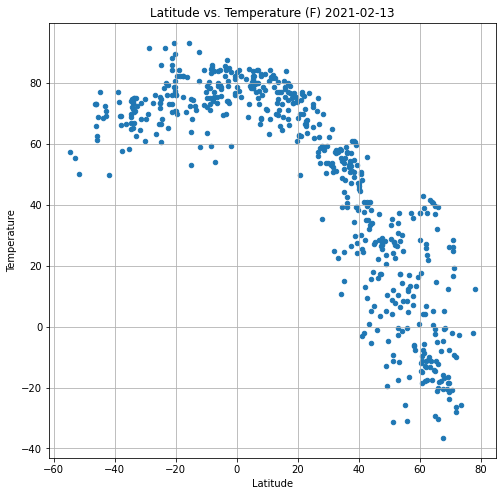

In [9]:
plt.figure()
date = datetime.utcfromtimestamp(df_clean['Date'][0]).strftime('%Y-%m-%d')


df_clean.plot(kind="scatter", x="Latitude", y="Temperature", grid=True, figsize=(8,8),
              title=f"Latitude vs. Temperature (F) {date}")
plt.savefig("output_data/LatVsTemp.png")
plt.show()

Here we can see that there is a tendency to the temperature to increase up to 30 C at latitude 0, and from there it starts to decrease

## Latitude vs. Humidity Plot

<Figure size 432x288 with 0 Axes>

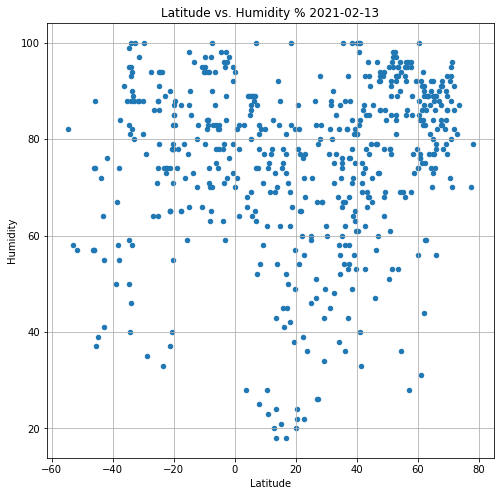

In [10]:
plt.figure()
df_clean.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title=f"Latitude vs. Humidity % {date}")
plt.savefig("output_data/LatVsHum.png")
plt.show()

We can see that this plot is very scaterred and probably does not have any clear tendency

## Latitude vs. Cloudiness Plot

<Figure size 432x288 with 0 Axes>

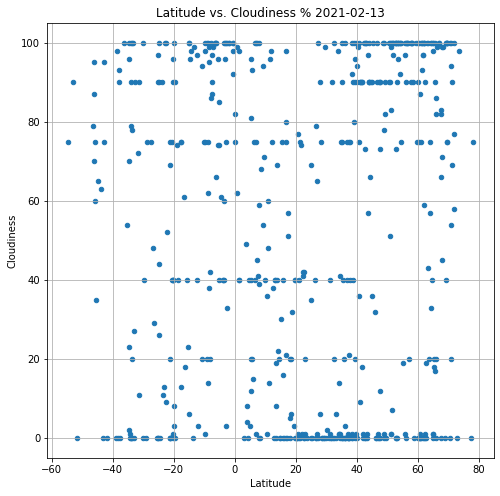

In [11]:
plt.figure()
df_clean.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(8,8),
              title=f"Latitude vs. Cloudiness % {date}")
plt.savefig("output_data/LatVsCloud.png")
plt.show()

Again we see that this plot is very scatered and probably does not have any particular tendency

## Latitude vs. Wind Speed Plot

<Figure size 432x288 with 0 Axes>

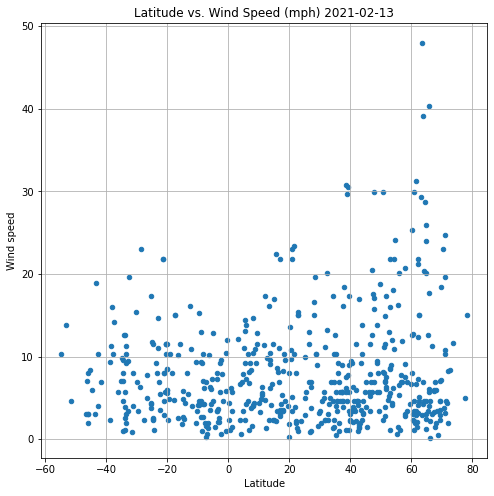

In [12]:
plt.figure()
df_clean.plot(kind="scatter", x="Latitude", y="Wind speed", grid=True, figsize=(8,8),
              title=f"Latitude vs. Wind Speed (mph) {date}")
plt.savefig("output_data/LatVsWind.png")
plt.show()

This plot shows a very small tendency to increase the wind speed towards higher latitude cities

## Linear Regression

In [13]:
#Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
northern = df_clean.loc[df_clean['Latitude'] >= 0]
northern.head()

,City,Country,Temperature,Humidity,Cloudiness,Wind speed,Latitude,Longitude,Max Temperature,Date
0,talavera,PH,80.60,74,75,22.37,15.6167,120.9333,80.60,1613185555
1,saskylakh,RU,-27.94,82,77,1.92,71.9167,114.0833,-27.94,1613185555
4,butaritari,KI,81.32,83,0,12.15,3.0707,172.7902,81.32,1613185279
6,pokaran,IN,66.60,26,1,6.29,26.9167,71.9167,66.60,1613185556
9,tasiilaq,GL,32.00,74,90,40.29,65.6145,-37.6368,32.00,1613185557


In [14]:
southern = df_clean.loc[df_clean['Latitude'] < 0]
southern.head()

,City,Country,Temperature,Humidity,Cloudiness,Wind speed,Latitude,Longitude,Max Temperature,Date
2,geraldton,AU,91.40,35,75,23.02,-28.7667,114.6000,91.40,1613185555
3,vaini,TO,86.00,74,75,8.05,-21.2000,-175.2000,86.00,1613185556
5,cardoso,BR,70.68,87,100,5.59,-20.0819,-49.9142,70.68,1613185556
7,florianopolis,BR,73.40,94,75,2.30,-27.6146,-48.5012,73.40,1613185386
8,new norfolk,AU,70.79,41,95,4.00,-42.7826,147.0587,75.00,1613185557


####  Northern Hemisphere - Temp vs. Latitude Linear Regression

R squared: 0.7824701351632896


<Figure size 432x288 with 0 Axes>

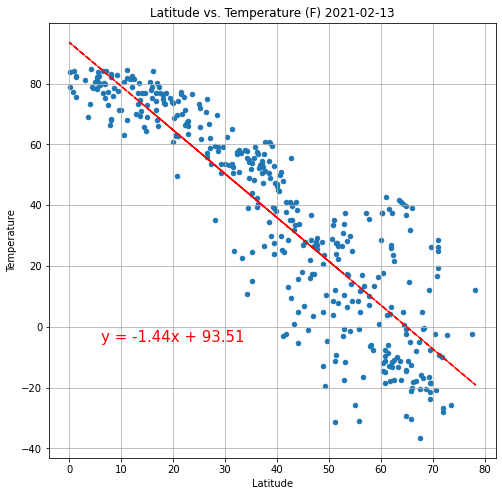

In [15]:
plt.figure()
northern.plot(kind="scatter", x="Latitude", y="Temperature", grid=True, figsize=(8,8),
              title=f"Latitude vs. Temperature (F) {date}")


latitude = northern['Latitude']
temperature = northern['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)


regress_values = slope * latitude + intercept
plt.plot(latitude,regress_values,"--",color='r')


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,-5),fontsize=15,color="red")

print(f"R squared: {rvalue**2}")
plt.savefig("output_data/NorthLatVsTemp.png")
plt.show()

We see there is a strong negative correlation between the latitude and the temperature for the Northern Hemisphere 

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

R squared: 0.20776437109642668


<Figure size 432x288 with 0 Axes>

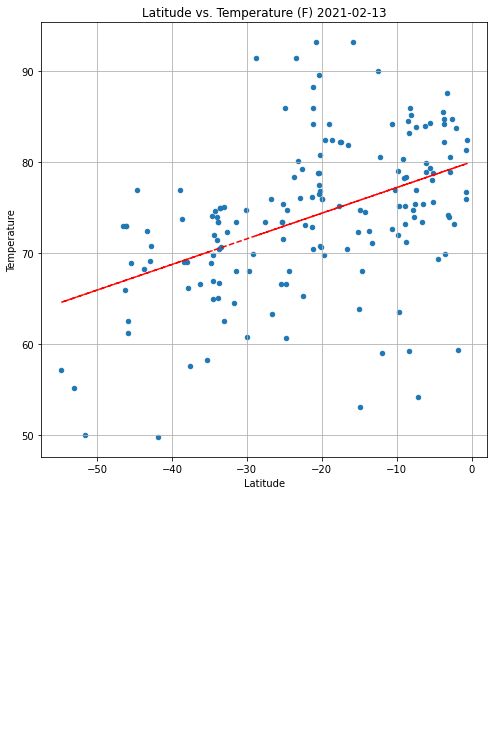

In [16]:
plt.figure()
southern.plot(kind="scatter", x="Latitude", y="Temperature", grid=True, figsize=(8,8),
              title=f"Latitude vs. Temperature (F) {date}")


latitude = southern['Latitude']
temperature = southern['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)


regress_values = slope * latitude + intercept
plt.plot(latitude,regress_values,"--",color='r')


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,16),fontsize=15,color="red")

print(f"R squared: {rvalue**2}")
plt.savefig("output_data/SouthLatVsTemp.png")

plt.show()

We see there is a weak correlation between the Latitude and the temperature for the Southern Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.1260043903787615


<Figure size 432x288 with 0 Axes>

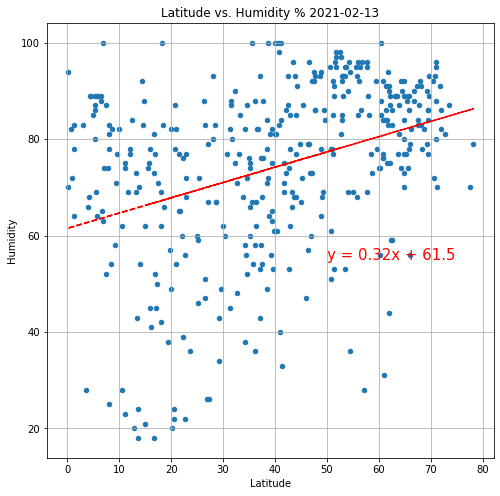

In [17]:
plt.figure()
northern.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title=f"Latitude vs. Humidity % {date}")

latitude = northern['Latitude']
temperature = northern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)


regress_values = slope * latitude + intercept
plt.plot(latitude,regress_values,"--",color='r')


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,55),fontsize=15,color="red")

print(f"R squared: {rvalue**2}")
plt.savefig("output_data/NorthLatVsHum.png")

plt.show()

We see there is very weak or no correlation between latitude and Humidity for the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.09780331520895029


<Figure size 432x288 with 0 Axes>

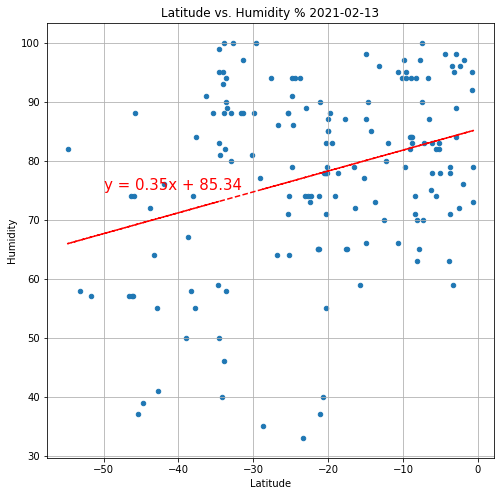

In [18]:
plt.figure()
southern.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title=f"Latitude vs. Humidity % {date}")


latitude = southern['Latitude']
temperature = southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)


regress_values = slope * latitude + intercept
plt.plot(latitude,regress_values,"--",color='r')


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,75),fontsize=15,color="red")

print(f"R squared: {rvalue**2}")
plt.savefig("output_data/SouthLatVsHum.png")

plt.show()

With the linear regression we cannot notice any clear correlation, however, we can see that towars higher latitudes the humidity tends to clump towars higher humidities, we would require further analysis to drive a conclussion for the Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.07132559887119602


<Figure size 432x288 with 0 Axes>

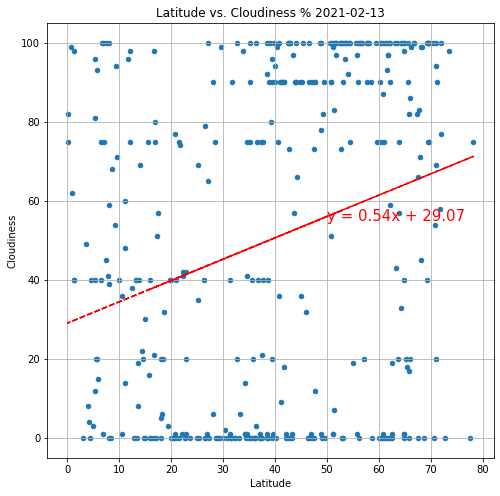

In [19]:
plt.figure()
northern.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(8,8),
              title=f"Latitude vs. Cloudiness % {date}")

latitude = northern['Latitude']
temperature = northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)


regress_values = slope * latitude + intercept
plt.plot(latitude,regress_values,"--",color='r')


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,55),fontsize=15,color="red")

print(f"R squared: {rvalue**2}")
plt.savefig("output_data/NorthLatVsCloud.png")

plt.show()

We cannot notice any particular tendency or correlation with latitude and cloudines for the Northern Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.039837770699586904


<Figure size 432x288 with 0 Axes>

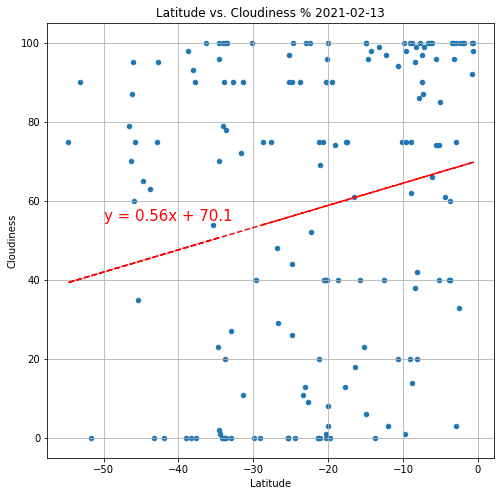

In [20]:
plt.figure()
southern.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(8,8),
              title=f"Latitude vs. Cloudiness % {date}")

latitude = southern['Latitude']
temperature = southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)


regress_values = slope * latitude + intercept
plt.plot(latitude,regress_values,"--",color='r')


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")

print(f"R squared: {rvalue**2}")
plt.savefig("output_data/SouthLatVsCloud.png")

plt.show()

We cannot notice any particular tendency or correlation with latitude and cloudines for the Southern Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.017557539297670757


<Figure size 432x288 with 0 Axes>

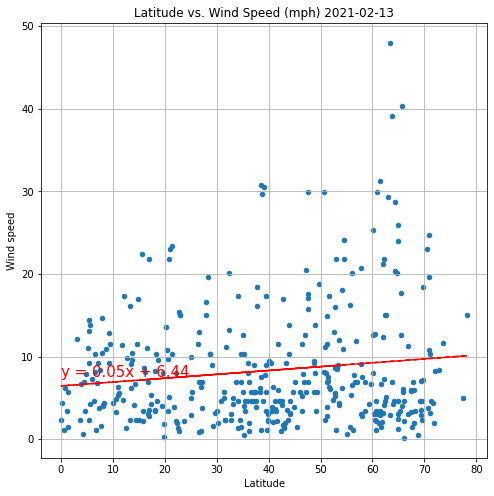

In [21]:
plt.figure()
northern.plot(kind="scatter", x="Latitude", y="Wind speed", grid=True, figsize=(8,8),
              title=f"Latitude vs. Wind Speed (mph) {date}")

latitude = northern['Latitude']
temperature = northern['Wind speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)


regress_values = slope * latitude + intercept
plt.plot(latitude,regress_values,"--",color='r')


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,7.5),fontsize=15,color="red")

print(f"R squared: {rvalue**2}")
plt.savefig("output_data/NorthLatVsWind.png")

plt.show()

We see there is no correlation between latitude and wind speed for the Northern Hemisphere, however we can notice that towards higher latitudes there are cities with more wind speed, we would need further analysis to drive any conclusions

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.02750029529220425


<Figure size 432x288 with 0 Axes>

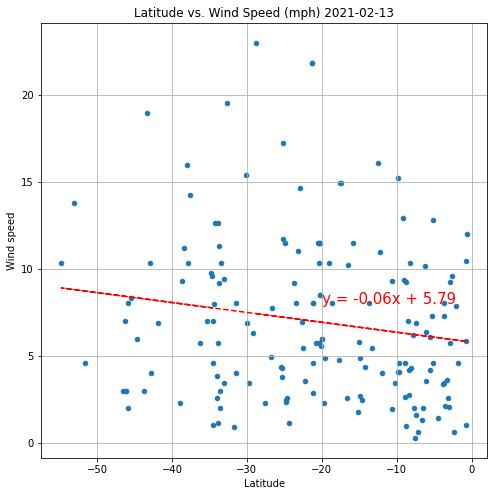

In [22]:
plt.figure()
southern.plot(kind="scatter", x="Latitude", y="Wind speed", grid=True, figsize=(8,8),
              title=f"Latitude vs. Wind Speed (mph) {date}")

latitude = southern['Latitude']
temperature = southern['Wind speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)


regress_values = slope * latitude + intercept
plt.plot(latitude,regress_values,"--",color='r')


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,8),fontsize=15,color="red")

print(f"R squared: {rvalue**2}")
plt.savefig("output_data/SouthLatVsWind.png")


plt.show()

We see there is no correlation between Latitude and wind speed for the Southern Hemisphere, we would also need further analysis to drive any conclusions